### Taller 5

In [155]:
import numpy as np
import pandas as pd

In [156]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

df = df.dropna()

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [158]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


Coficicación de las variables cualitativas

In [159]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

Separamos los datos de entrenamiento y prueba

In [160]:
train = df.sample(frac=0.8, random_state=100)
test = df.drop(train.index)
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


Etiquetas

In [161]:
train_X = train[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
test_X = test[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [162]:
train_X.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight'], dtype='object')

In [163]:
import setuptools.dist # necesario en versión 3.12 de python
import tensorflow as tf

In [164]:
norm = tf.keras.layers.Normalization()

In [165]:
norm.adapt(np.array(train_X))

In [166]:
norm

<Normalization name=normalization_4, built=True>

### Creación del modelo

In [167]:
dnn_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [168]:
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [169]:
%%time
history = dnn_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 19.8737 - val_loss: 8.3895
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6332 - val_loss: 4.0976
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2143 - val_loss: 3.2259
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4703 - val_loss: 3.9376
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2371 - val_loss: 2.9422
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3922 - val_loss: 2.7728
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.0478 - val_loss: 2.9334
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1390 - val_loss: 2.9107
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4991 - val_loss: 3.0944
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6746 - val_loss: 3.3737
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.6278 - val_loss: 3.0468
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4999 - val_loss: 3.0309
Epoch 13/

In [170]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'Model_0'

In [171]:
hist.head()

,loss,val_loss,epoch,model
0,16.145685,8.389451,0,Model_0
1,6.793594,4.097598,1,Model_0
2,4.033102,3.225942,2,Model_0
3,3.545754,3.937595,3,Model_0
4,3.269969,2.942201,4,Model_0


In [172]:
import matplotlib.pyplot as plt

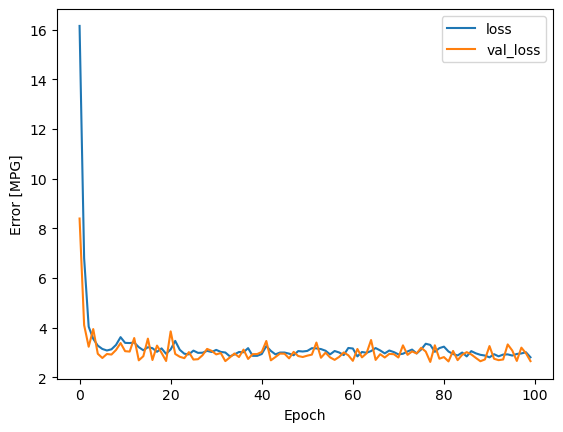

In [173]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

## Punto 4 
Creación de 3 casos diferentes al modelo base cambiando las capas

Modelo 1

In [174]:
model4_1 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])


In [175]:
model4_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [176]:
%%time
history41 = model4_1.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 19.3452 - val_loss: 8.7513
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.8219 - val_loss: 5.0136
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1845 - val_loss: 4.3485
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8098 - val_loss: 3.0743
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0910 - val_loss: 2.8052
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8255 - val_loss: 2.7754
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9870 - val_loss: 3.3270
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2923 - val_loss: 2.9412
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1752 - val_loss: 2.9877
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.8349 - val_loss: 2.9269
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.0252 - val_loss: 2.9100
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0563 - val_loss: 2

In [177]:
hist1 = pd.DataFrame(history41.history)
hist1['epoch'] = history41.epoch
hist1['model'] = 'Model_1'

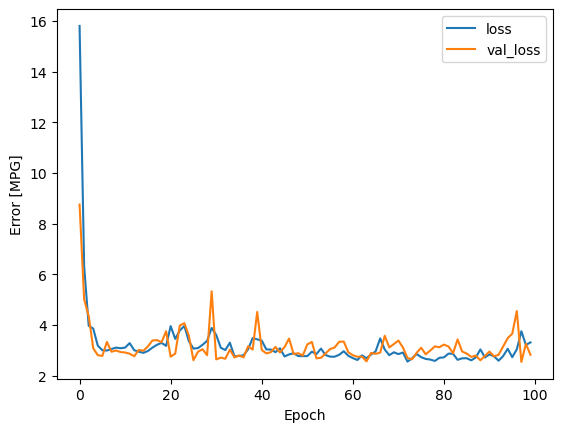

In [178]:
plt.plot(history41.history['loss'], label='loss')
plt.plot(history41.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 2

In [179]:
model4_2 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [180]:
model4_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [181]:
%%time
history42 = model4_2.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 33.5126 - val_loss: 21.3000
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.3474 - val_loss: 16.9522
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.2642 - val_loss: 6.2774
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.8538 - val_loss: 4.9306
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.6703 - val_loss: 4.3508
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.5643 - val_loss: 3.6352
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.2546 - val_loss: 5.2390
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2815 - val_loss: 4.3069
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0073 - val_loss: 3.7537
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.7186 - val_loss: 3.6846
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.5209 - val_loss: 3.4443
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4055 - val_l

In [182]:
hist2 = pd.DataFrame(history42.history)
hist2['epoch'] = history42.epoch
hist2['model'] = 'Model_2'

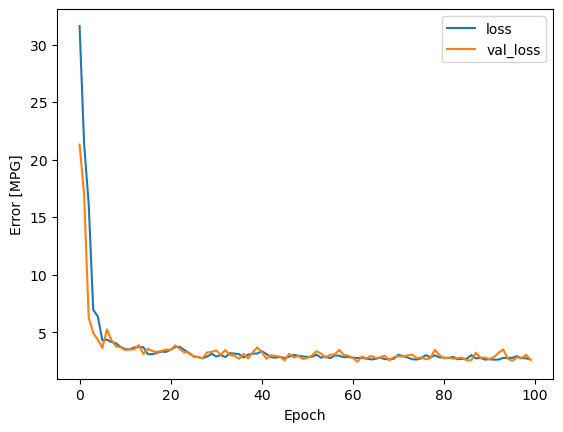

In [183]:
plt.plot(history42.history['loss'], label='loss')
plt.plot(history42.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 3

In [193]:
model4_3 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [194]:
model4_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [195]:
%%time
history43 = model4_3.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 17.7321 - val_loss: 9.2612
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.4156 - val_loss: 3.6509
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.6383 - val_loss: 3.3795
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.4205 - val_loss: 3.5040
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.8511 - val_loss: 3.4593
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.5913 - val_loss: 4.1203
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.8725 - val_loss: 3.4771
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.5919 - val_loss: 5.8065
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.6614 - val_loss: 3.1999
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.5478 - val_loss: 5.2680
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5658 - val_loss: 2.7564
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.0123 - val_l

In [196]:
hist3 = pd.DataFrame(history43.history)
hist3['epoch'] = history43.epoch
hist3['model'] = 'Model_3'

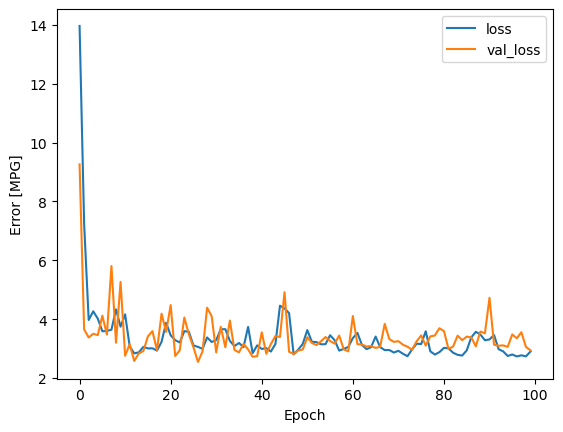

In [197]:
plt.plot(history43.history['loss'], label='loss')
plt.plot(history43.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [198]:
hist_t = pd.concat([hist,hist1,hist2,hist3], ignore_index=True)

In [199]:
import seaborn as sns


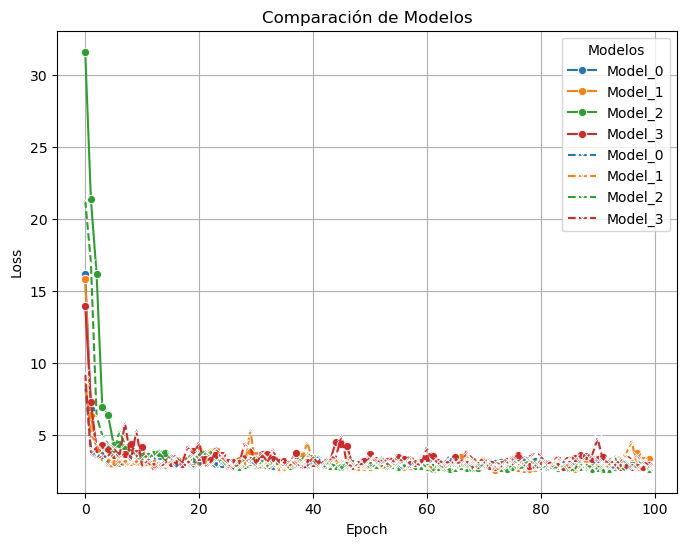

In [200]:

plt.figure(figsize=(8,6))

sns.lineplot(data=hist_t, x='epoch', y='loss', hue='model', linestyle='solid', marker='o')
sns.lineplot(data=hist_t, x='epoch', y='val_loss', hue='model', linestyle='dashed', marker='x')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparación de Modelos')
plt.legend(title="Modelos")
plt.grid(True)
plt.show()

Las diferencias entre los modelos fueron mínimas, por lo que no se puede observar en la escala normal. Para esto, se graficó la diferencia entre cada modelo modificado con el original, generando los siguientes resultados.

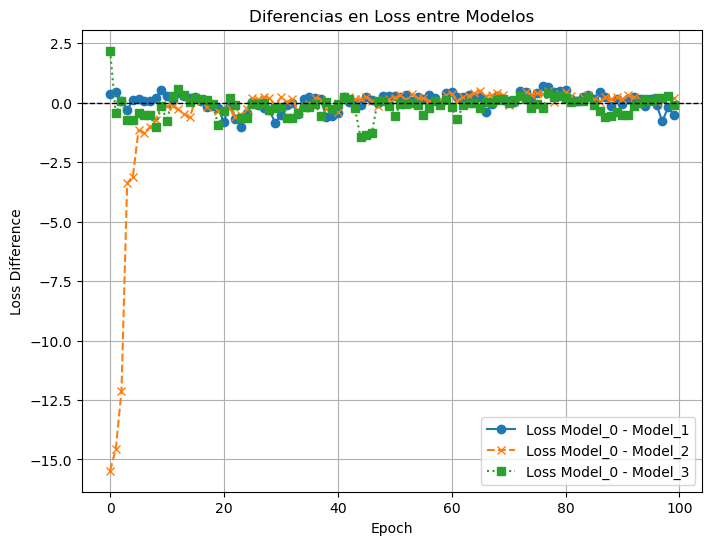

In [201]:



#Calcular las diferencias entre modelos
diff01 = hist['loss'] - hist1['loss']
diff02 = hist['loss'] - hist2['loss']
diff03 = hist['loss'] - hist3['loss']

#Graficar las diferencias
plt.figure(figsize=(8,6))
plt.plot(hist['epoch'], diff01, label='Loss Model_0 - Model_1', linestyle='solid', marker='o')
plt.plot(hist['epoch'], diff02, label='Loss Model_0 - Model_2', linestyle='dashed', marker='x')
plt.plot(hist['epoch'], diff03, label='Loss Model_0 - Model_3', linestyle='dotted', marker='s')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss Difference')
plt.title('Diferencias en Loss entre Modelos')
plt.legend()
plt.grid(True)
plt.show()
